In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
import seaborn as sns

In [35]:
Colors = sns.color_palette("colorblind")
LimitsDict = {
    'HERA': {'years': [2022, 2023], 'color': Colors[0]},
    'MWA': {'years': [2014, 2015, '2016a', '2016b', '2019a', '2019b', 2020, '2021a', '2021b', 2023, 2025], 'color': Colors[1]},
    'LOFAR': {'years': [2017, 2019, 2020, 2024, 2025], 'color': Colors[2]},
    'GMRT': {'years': [2013, 2021], 'color': Colors[3]},
    'AARTFAAC': {'years': [2020], 'color': Colors[4]},
    'NenuFAR': {'years': [2024], 'color': Colors[5]},
    'PAPER': {'years': [2019], 'color': Colors[6]},
    'OVRO-LWA': {'years': [2019, 2021], 'color': Colors[7]},
}
MarkerStyles = ['o', 's', '^', 'v', 'D', 'x', '+', '*', 'h', 'p', 'H', 'P', '|', '_']

class PowerSpectrumLimits:
    def __init__(self, name):
        self.name = name
        file_path = f'data/{name}.txt'
        with open(file_path, 'r') as f:
            lines = f.readlines()
            self.author = lines[0].split(':',1)[0].replace('# ', '')
            self.arxiv_link = lines[0].split(':',1)[1].strip()
        self.data = pd.read_csv(file_path, header=1, sep=',\s+')

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/var/folders/19/kzw5nz4j5d37grxxb91y_y9r0000gn/T/ipykernel_8654/1243513111.py:22: SyntaxWarning: invalid escape sequence '\s'
  self.data = pd.read_csv(file_path, header=1, sep=',\s+')


/var/folders/19/kzw5nz4j5d37grxxb91y_y9r0000gn/T/ipykernel_8654/1243513111.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.data = pd.read_csv(file_path, header=1, sep=',\s+')
/var/folders/19/kzw5nz4j5d37grxxb91y_y9r0000gn/T/ipykernel_8654/1243513111.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.data = pd.read_csv(file_path, header=1, sep=',\s+')
/var/folders/19/kzw5nz4j5d37grxxb91y_y9r0000gn/T/ipykernel_8654/1243513111.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are 

MWA_2014 not found. Skipping.


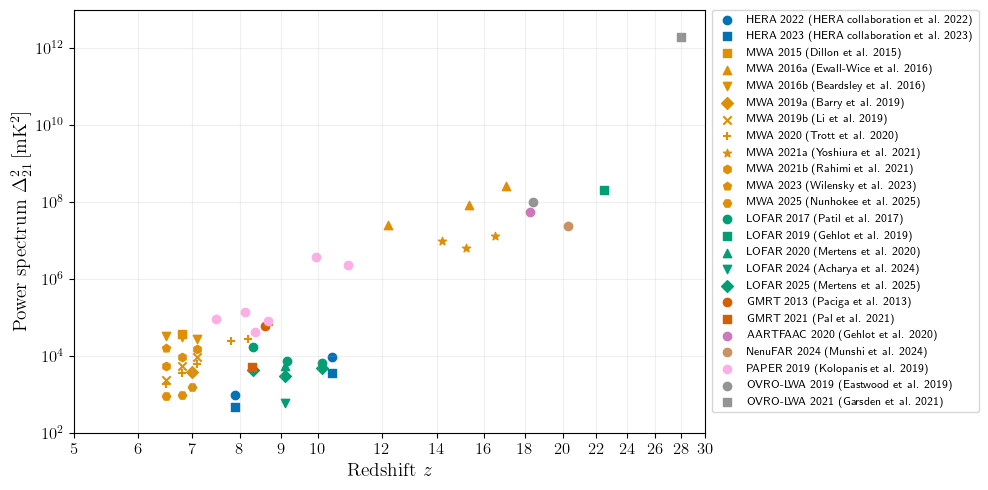

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the limits
for key, value in LimitsDict.items():
    for i, year in enumerate(value['years']):
        file_name = f'{key}_{year}'
        try:
            limits = PowerSpectrumLimits(file_name)
            z = limits.data['z_center'].values
            Dsq21 = limits.data['Dsq21[mK^2]'].values
            author = limits.author
            ax.scatter(z, Dsq21,
                    color=value['color'], 
                    marker=MarkerStyles[i], label=f'{file_name.replace('_',' ')} ({author})',)
        except FileNotFoundError:
            print(f"{file_name} not found. Skipping.")
            continue
        
# Axis and limits 
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e2,1e13)
ax.set_xlim(5,30)
x_ticks = [5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
ax.set_xticks(x_ticks)
ax.set_xticklabels([fr'$\mathrm{{{x}}}$' for x in x_ticks], fontsize=12)

# Labels and fonts
ax.set_xlabel(r'$\mathrm{Redshift}\,\,z$', fontsize=14)
ax.set_ylabel(r'$\mathrm{Power~spectrum}\,\,\Delta_{21}^2\,\mathrm{[mK^2]}$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Grid and legend 
ax.grid(axis='both', which='both', alpha=0.2)
ax.legend(loc='upper left', fontsize=8, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

# Save figure
fig.tight_layout()
fig.savefig('21cm_power_spectrum_limits.png', dpi=300, bbox_inches='tight')